In [1]:
#Importing essential libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
##Reading loan_data datafile from root folder.
loans = pd.read_csv('loan_data.csv')

In [134]:
#Checking Data head, info and describe.
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [135]:
#seems like i can get dummy data for purpose column.
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1010.2+ KB


In [136]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [137]:
loans['purpose'].value_counts() 

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [138]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'Credit Score')

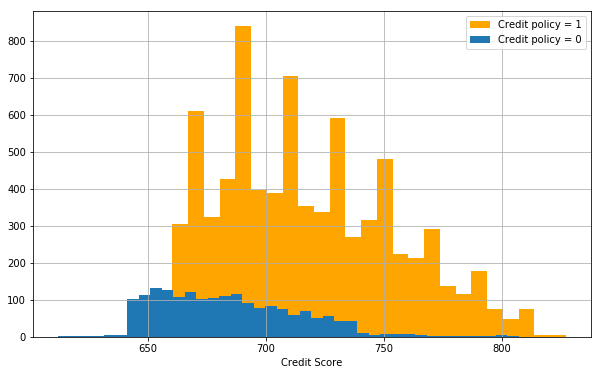

In [139]:
#Creating a histogram with credit policy and fico score.

plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(color = 'orange', label = 'Credit policy = 1', bins = 30)
loans[loans['credit.policy']==0]['fico'].hist( label = 'Credit policy = 0', bins = 40)
plt.legend()
plt.xlabel('Credit Score')


Text(0.5, 1.0, 'FICO vs Fully paid or not')

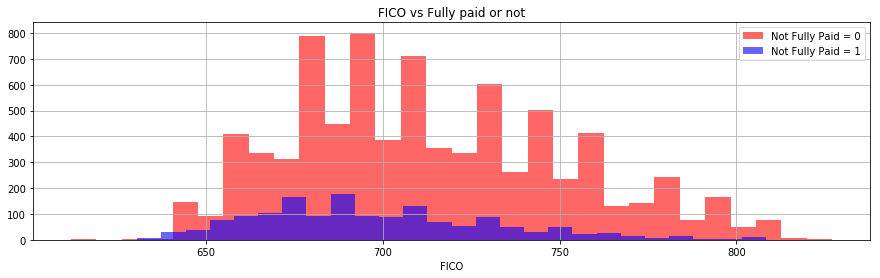

In [143]:
#Creating an overlapping histogram for Fico credit score vs fully paid or not.

plt.figure(figsize=(15,4))
loans[loans['not.fully.paid']==0]['fico'].hist(color = 'red', bins = 30, label = 'Not Fully Paid = 0', alpha = 0.6)
loans[loans['not.fully.paid']==1]['fico'].hist(color = 'blue', bins = 30, label = 'Not Fully Paid = 1', alpha = 0.6)
plt.legend()
plt.xlabel('FICO')
plt.title('FICO vs Fully paid or not')

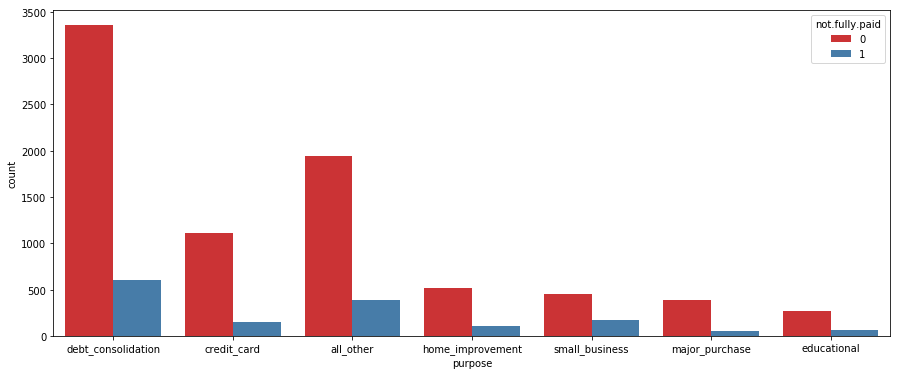

In [142]:
#creating a count plot for each type of loan with a contrast of fully paid or not.
plt.figure(figsize=(15,6))
sns.countplot(x = 'purpose', data = loans, hue = 'not.fully.paid', palette= 'Set1')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

c:\users\shoby\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


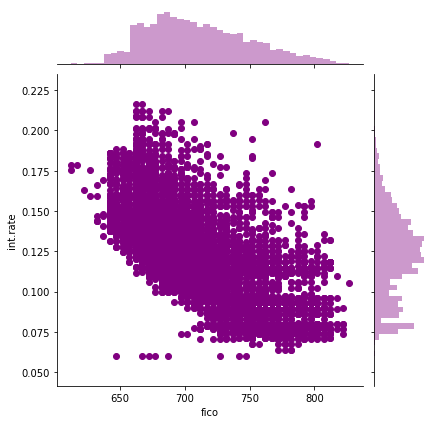

In [3]:
#the trend between FICO score and interest rate using a seaborn jointplot.
sns.jointplot(x='fico', y = 'int.rate', data = loans, color = 'purple')

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

c:\users\shoby\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1080x216 with 0 Axes>

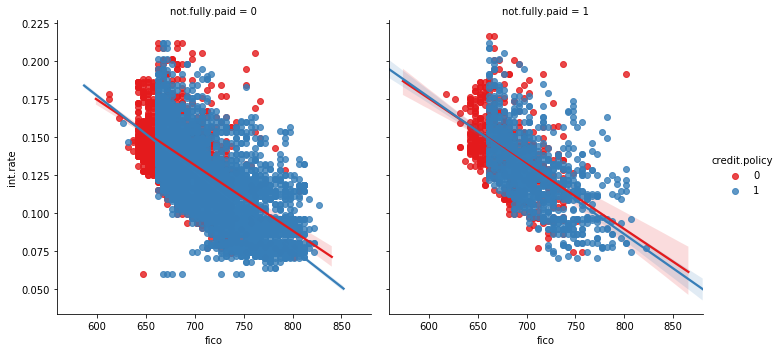

In [148]:
#lmplots between not fully paid vs credit policy.
plt.figure(figsize=(15,3))
sns.lmplot(y='int.rate', x = 'fico', data = loans, hue = 'credit.policy', col = 'not.fully.paid', palette = 'Set1')

In [4]:
#Preprocessing the data for training/testing.

#getting dummies for purpose column.

purpose = pd.get_dummies(loans['purpose'], drop_first= True)

In [5]:
#Concatinating purpose dummies data and loan dataframe.

loans = pd.concat([loans,purpose], axis = 1)

In [6]:
#Dropping the old purpose column from the loan dataframe.

loans.drop('purpose', axis = 1, inplace = True)

In [97]:
#Creating X that includes everything except "not fully paid" column. 

X = loans.drop('not.fully.paid', axis = 1)

In [98]:
#Creating y that only includes "not fully paid" column from the loan dataframe.

y = loans['not.fully.paid']

In [7]:
# importing sklearn train/test split

from sklearn.model_selection import train_test_split

In [100]:
#running the train/test split model to get X/y test/train datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [101]:
# training using decision tree

In [102]:
#Importing decision tree classifier from sklearn

from sklearn.tree import DecisionTreeClassifier

In [103]:
#importing random forest classifier from sklearn ensemble

from sklearn.ensemble import RandomForestClassifier

In [125]:
#initializing both models
#DTC for Decision tree classifier
#RFC for random forest classifer

DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(n_estimators= 3000)

In [126]:
#fitting both classifiers with training set.

DTC.fit(X_train, y_train)
RFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [127]:
# getting predictions from both trained models.

Dpred = DTC.predict(X_test)
Rpred = RFC.predict(X_test)

In [128]:
# importing classification report and confusion metrics.

from sklearn.metrics import classification_report, confusion_matrix

In [129]:
#printing out classification report and confusion matrix for decision tree

print ('For Decision Tree Classifier')
print ('Confusion Metrics')
print (confusion_matrix(y_test, Dpred))
print ('Classification Report')
print (classification_report(y_test, Dpred))



For Decision Tree Classifier
Confusion Metrics
[[1987  444]
 [ 340  103]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [130]:
#printing out classification report and confusion matrix for Random Forest.

print ('For Random Forest Classifier')
print ('Confusion Metrics')
print (confusion_matrix(y_test, Rpred))
print ('Classification Report')
print (classification_report(y_test, Rpred))

For Random Forest Classifier
Confusion Metrics
[[2425    6]
 [ 433   10]]
Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.62      0.02      0.04       443

   micro avg       0.85      0.85      0.85      2874
   macro avg       0.74      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874

